In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [84]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'Augmented Images',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 8120 files belonging to 6 classes.


In [85]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'Augmented Images/',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 8120 files belonging to 6 classes.


In [86]:
validation_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None))>

In [87]:
cnn = tf.keras.models.Sequential()

In [88]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [89]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [90]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [91]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [92]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [93]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [94]:
cnn.add(tf.keras.layers.Flatten())

In [95]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [96]:
cnn.add(tf.keras.layers.Dropout(0.4))

In [97]:
cnn.add(tf.keras.layers.Dense(units=6,activation='softmax'))

In [98]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

In [99]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_21 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_23 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None))>

In [100]:
training_history = cnn.fit(x=training_set, validation_data=validation_set, epochs=5)

Epoch 1/5




254/254 [==============================] - 271s 1s/step - loss: 5917.1201 - accuracy: 0.2195 - val_loss: 1.7289 - val_accuracy: 0.2371
Epoch 2/5
254/254 [==============================] - 275s 1s/step - loss: 1.7324 - accuracy: 0.2362 - val_loss: 1.7285 - val_accuracy: 0.2371
Epoch 3/5
254/254 [==============================] - 271s 1s/step - loss: 1.7310 - accuracy: 0.2369 - val_loss: 1.7286 - val_accuracy: 0.2371
Epoch 4/5
254/254 [==============================] - 659s 3s/step - loss: 1.7314 - accuracy: 0.2363 - val_loss: 1.7283 - val_accuracy: 0.2371
Epoch 5/5
254/254 [==============================] - 268s 1s/step - loss: 1.7300 - accuracy: 0.2368 - val_loss: 1.7282 - val_accuracy: 0.2371


In [101]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

254/254 [==============================] - 56s 220ms/step - loss: 1.7282 - accuracy: 0.2371
Training accuracy: 0.23706896603107452


In [102]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

254/254 [==============================] - 49s 194ms/step - loss: 1.7282 - accuracy: 0.2371
Validation accuracy: 0.23706896603107452


In [103]:
cnn.save('trained_plant_model.keras')

In [104]:
training_history.history

{'loss': [5917.1201171875,
  1.7323704957962036,
  1.7309999465942383,
  1.7314187288284302,
  1.7299938201904297],
 'accuracy': [0.21945813298225403,
  0.23620688915252686,
  0.23694580793380737,
  0.236330047249794,
  0.23682266473770142],
 'val_loss': [1.7289278507232666,
  1.7284603118896484,
  1.7285969257354736,
  1.7283434867858887,
  1.7282216548919678],
 'val_accuracy': [0.23706896603107452,
  0.23706896603107452,
  0.23706896603107452,
  0.23706896603107452,
  0.23706896603107452]}

In [105]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [106]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


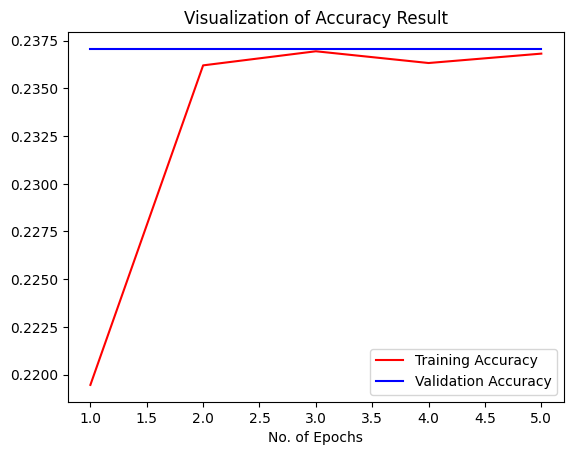

In [107]:
import json
import matplotlib.pyplot as plt

with open('training_hist.json', 'r') as file:
    training_history = json.load(file)

epochs = [i for i in range(1,6)]
plt.plot(epochs,training_history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()


In [108]:
class_name = validation_set.class_names
# class_name = ['Arjun Leaf','Curry Leaf','marsh Pennywort Leaf','Mint Leaf','Neem Leaf','Rubble Leaf']
class_name

['Arjun Leaf',
 'Curry Leaf',
 'Marsh Pennywort Leaf',
 'Mint Leaf',
 'Neem Leaf',
 'Rubble Leaf']

In [109]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'Test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 33 files belonging to 6 classes.


In [110]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

33/33 [==============================] - 1s 22ms/step


In [111]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [112]:
Y_true

<tf.Tensor: shape=(33,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5], dtype=int64)>

In [113]:
predicted_categories

<tf.Tensor: shape=(33,), dtype=int64, numpy=
array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], dtype=int64)>

In [114]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [115]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                      precision    recall  f1-score   support

          Arjun Leaf       0.00      0.00      0.00         6
          Curry Leaf       0.00      0.00      0.00         6
Marsh Pennywort Leaf       0.00      0.00      0.00         6
           Mint Leaf       0.00      0.00      0.00         5
           Neem Leaf       0.00      0.00      0.00         5
         Rubble Leaf       0.15      1.00      0.26         5

            accuracy                           0.15        33
           macro avg       0.03      0.17      0.04        33
        weighted avg       0.02      0.15      0.04        33



c:\Users\Atharva Kulkarni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Atharva Kulkarni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Atharva Kulkarni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

In [116]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                      precision    recall  f1-score   support

          Arjun Leaf       0.00      0.00      0.00         6
          Curry Leaf       0.00      0.00      0.00         6
Marsh Pennywort Leaf       0.00      0.00      0.00         6
           Mint Leaf       0.00      0.00      0.00         5
           Neem Leaf       0.00      0.00      0.00         5
         Rubble Leaf       0.15      1.00      0.26         5

            accuracy                           0.15        33
           macro avg       0.03      0.17      0.04        33
        weighted avg       0.02      0.15      0.04        33



c:\Users\Atharva Kulkarni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Atharva Kulkarni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Atharva Kulkarni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

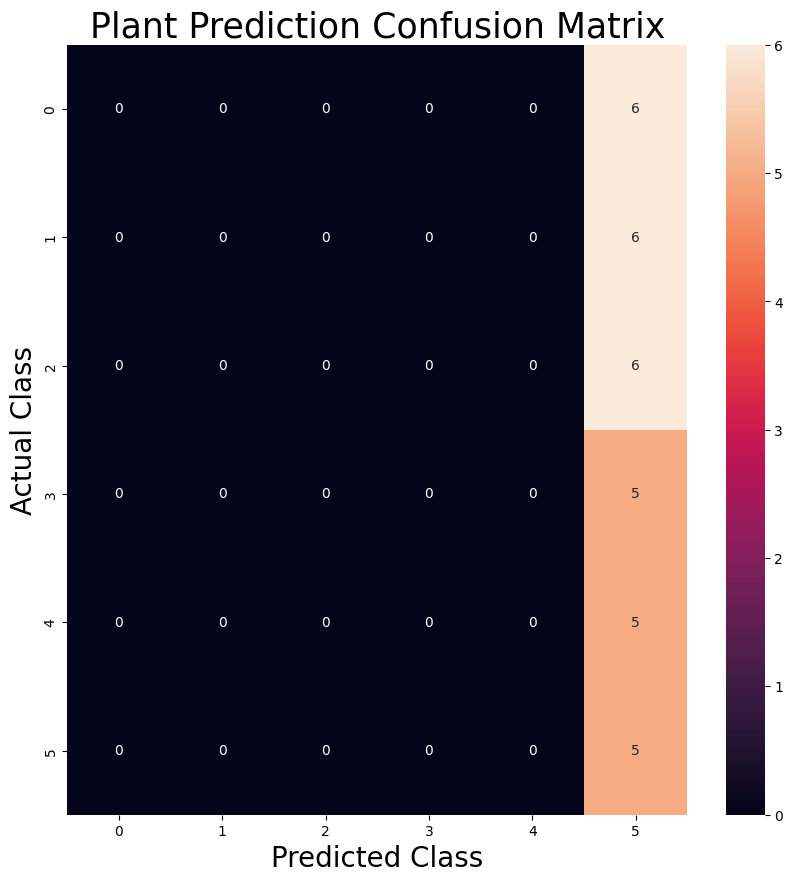

In [117]:

plt.figure(figsize=(10, 10))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Prediction Confusion Matrix',fontsize = 25)
plt.show()